In [2]:
!pip install numpy 
!pip install pandas 
!pip install tensorflow
!pip install matplotlib
!pip install keras
!pip install keras

In [3]:
!pip install scikit-learn

In [4]:
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense,LSTM,Dropout
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt


In [5]:
data=pd.read_csv(r"C:\Users\HP\Desktop\proj 1\stock.csv")

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7160 entries, 0 to 7159
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       7160 non-null   object 
 1   Open       7160 non-null   float64
 2   High       7160 non-null   float64
 3   Low        7160 non-null   float64
 4   Close      7160 non-null   float64
 5   Adj Close  7160 non-null   float64
 6   Volume     7160 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 391.7+ KB


In [7]:
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,01-11-1994,8.3125,8.3125,8.1875,8.2500,6.565471,2176400
1,02-11-1994,8.2500,8.2500,8.1875,8.1875,6.515731,2348200
2,03-11-1994,8.1875,8.2500,8.1250,8.1875,6.515731,2060800
3,04-11-1994,8.1875,8.2500,8.1250,8.1250,6.465993,2663800
4,07-11-1994,8.0625,8.0625,8.0000,8.0625,6.416255,1049400


In [8]:
data["Close"]=pd.to_numeric(data.Close,errors='coerce')
data=data.dropna()

In [9]:
trainData=data.iloc[:,4:5].values
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7160 entries, 0 to 7159
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       7160 non-null   object 
 1   Open       7160 non-null   float64
 2   High       7160 non-null   float64
 3   Low        7160 non-null   float64
 4   Close      7160 non-null   float64
 5   Adj Close  7160 non-null   float64
 6   Volume     7160 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 391.7+ KB


In [10]:
sc=MinMaxScaler(feature_range=(0,1))
trainData=sc.fit_transform(trainData)
trainData.shape

(7160, 1)

In [12]:
X_train=[]
Y_train=[]

for i in range (60,1149):
    X_train.append(trainData[i-60:i,0])
    Y_train.append(trainData[i,0])

X_train,Y_train=np.array(X_train),np.array(Y_train)

In [13]:
X_train=np.reshape(X_train,(X_train.shape[0],X_train.shape[1],1))
X_train.shape

(1089, 60, 1)

In [14]:
model=Sequential()
model.add(LSTM(units=100,return_sequences=True, input_shape=(X_train.shape[1],1)))
model.add(Dropout(0.2))

model.add(LSTM(units=100,return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(units=100,return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(units=100,return_sequences=False))
model.add(Dropout(0.2))

model.add(Dense(units=1))
model.compile(optimizer='adam', loss="mean_squared_error")

In [15]:
hist=model.fit(X_train,Y_train,epochs=20,batch_size=32,verbose=2)

Epoch 1/20
35/35 - 17s - loss: 5.7449e-05 - 17s/epoch - 477ms/step
Epoch 2/20
35/35 - 6s - loss: 2.0128e-05 - 6s/epoch - 162ms/step
Epoch 3/20
35/35 - 6s - loss: 1.0046e-05 - 6s/epoch - 168ms/step
Epoch 4/20
35/35 - 5s - loss: 4.3564e-06 - 5s/epoch - 155ms/step
Epoch 5/20
35/35 - 6s - loss: 3.7889e-06 - 6s/epoch - 171ms/step
Epoch 6/20
35/35 - 7s - loss: 2.3231e-06 - 7s/epoch - 208ms/step
Epoch 7/20
35/35 - 7s - loss: 2.7232e-06 - 7s/epoch - 207ms/step
Epoch 8/20
35/35 - 8s - loss: 3.6384e-06 - 8s/epoch - 223ms/step
Epoch 9/20
35/35 - 6s - loss: 2.5610e-06 - 6s/epoch - 177ms/step
Epoch 10/20
35/35 - 8s - loss: 2.1195e-06 - 8s/epoch - 222ms/step
Epoch 11/20
35/35 - 8s - loss: 2.8300e-06 - 8s/epoch - 228ms/step
Epoch 12/20
35/35 - 8s - loss: 3.4657e-06 - 8s/epoch - 222ms/step
Epoch 13/20
35/35 - 7s - loss: 1.9433e-06 - 7s/epoch - 201ms/step
Epoch 14/20
35/35 - 7s - loss: 1.8780e-06 - 7s/epoch - 187ms/step
Epoch 15/20
35/35 - 6s - loss: 1.6147e-06 - 6s/epoch - 180ms/step
Epoch 16/20
35/35

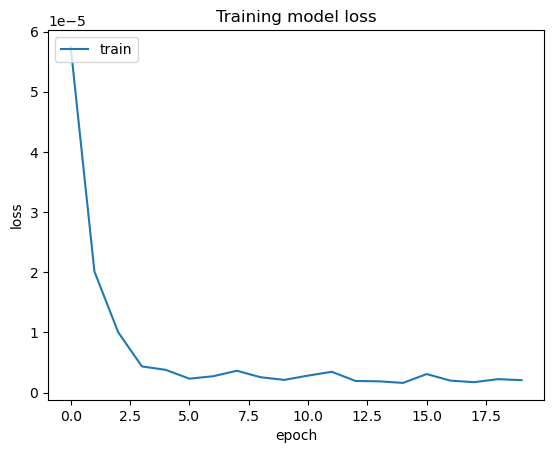

In [16]:
plt.plot(hist.history['loss'])
plt.title('Training model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'],loc='upper left')
plt.show()

In [18]:
testData=pd.read_csv(r"C:\Users\HP\Desktop\proj 1\stock.csv")
testData["Close"]=pd.to_numeric(testData.Close,errors='coerce')
testData=testData.dropna()
testData=testData.iloc[:,4:5]
Y_test=testData.iloc[60:,0:].values
#VALUES 
inputClosing=testData.iloc[:,0:].values
inputClosing_scaled=sc.transform(inputClosing)
inputClosing_scaled.shape
X_test=[]
length = len(testData)
time=60
for i in range(time,length):
    X_test.append(inputClosing_scaled[i-time:i,0])
X_test=np.array(X_test)
X_test=np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))
X_test.shape

(7100, 60, 1)

In [19]:
y_pred=model.predict(X_test)
y_pred

222/222 [==============================] - 13s 52ms/step


array([[0.00233976],
       [0.00228679],
       [0.00221669],
       ...,
       [0.5707627 ],
       [0.57189053],
       [0.5729695 ]], dtype=float32)

In [20]:
predicted_price = sc.inverse_transform(y_pred)

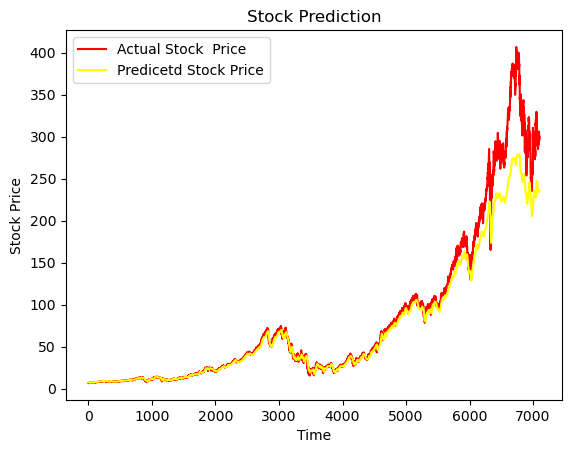

In [21]:
plt.plot(Y_test,color='red',label='Actual Stock  Price')
plt.plot(predicted_price,color='yellow',label='Predicetd Stock Price')
plt.title('Stock Prediction')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()